In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sc_stats

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 12,
  'grid.alpha': 0.25})


# Uniform distribution

## A uniform distribution of rolling a dice $N$ times

In [38]:
#rng = np.random.default_rng(seed=2022_09_22)   # random number generator (fix)
rng = np.random.default_rng()

# Roll a dice N times
N = 1000000
roll_dice = rng.integers(1, 7, N)
roll_dice[:100]   # print only the first 100

array([5, 2, 6, 1, 6, 4, 1, 6, 5, 6, 6, 1, 6, 6, 5, 6, 5, 6, 6, 5, 1, 5,
       4, 2, 2, 6, 5, 5, 4, 3, 4, 4, 2, 4, 5, 6, 3, 3, 3, 3, 5, 1, 1, 6,
       1, 3, 5, 2, 6, 5, 4, 1, 5, 2, 4, 1, 5, 2, 5, 3, 3, 4, 3, 2, 4, 5,
       2, 2, 2, 1, 6, 5, 5, 4, 1, 3, 6, 6, 5, 6, 1, 1, 5, 1, 5, 6, 4, 5,
       1, 1, 5, 1, 3, 5, 2, 2, 6, 1, 2, 5])

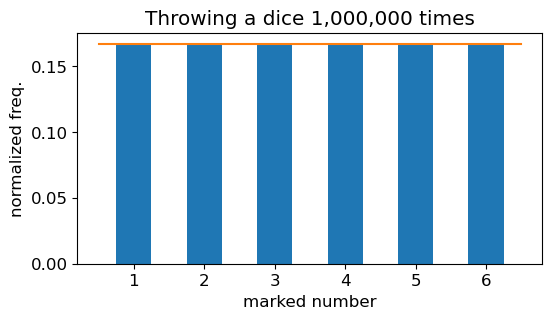

In [39]:
fig, ax = plt.subplots(figsize=(6, 3))

bins = np.arange(7) + 0.5
ax.hist(roll_dice, bins=bins, rwidth=0.5, density=True)
ax.plot([0.5, 6.5], [1/6, 1/6])

ax.set_xlabel("marked number")
ax.set_ylabel("normalized freq.")
ax.set_title(f"Throwing a dice {N:,} times")

plt.show(fig)

# Normal distribution

## A normal distribution of flipping a coin $N$ times

In [48]:
rng = np.random.default_rng()

# H = Head, T = Tail
N = 100

# number of experiment (how many times we flip the coin N times)
m = 100000    # (28 secs) 
#m = 10000     # (3 secs)
#m = 1000
#m = 100
rand_vars = np.empty(m, dtype=int)
# Do N flipping coins m times

for i in range(m):
  flip_coin = rng.choice(['H', 'T'], N)

  # Count the number of head occurs in N times flipping
  # divided by N to normalize it
  rand_vars[i] = sum(flip_coin == 'H')

rand_vars[:100]   #  print the first 100 means of sum of Head position


array([54, 56, 50, 49, 59, 48, 38, 48, 46, 52, 54, 56, 46, 47, 60, 59, 55,
       57, 42, 56, 55, 56, 43, 46, 45, 43, 40, 59, 52, 55, 56, 45, 48, 50,
       44, 43, 49, 44, 47, 44, 39, 56, 48, 56, 53, 54, 57, 57, 47, 53, 59,
       49, 49, 54, 53, 55, 56, 48, 48, 50, 45, 48, 48, 54, 50, 51, 45, 54,
       49, 53, 49, 46, 47, 46, 51, 53, 54, 47, 52, 54, 48, 61, 51, 59, 40,
       54, 53, 45, 40, 59, 54, 49, 46, 48, 57, 41, 54, 52, 54, 50])

sigma = 5.01


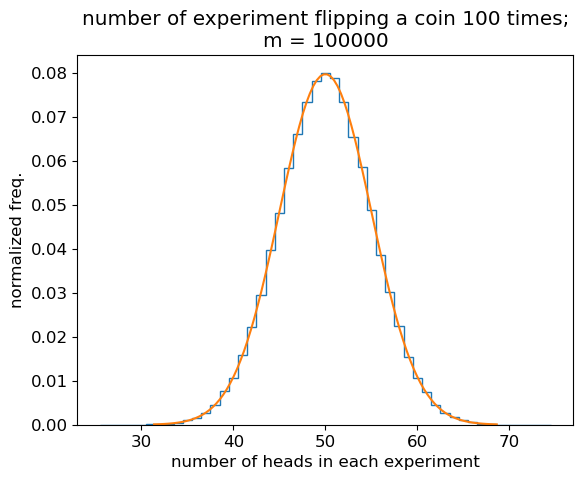

In [49]:
fig, ax = plt.subplots()

bins = np.arange(N/4, 3*N/4) + 0.5
ax.hist(rand_vars, histtype="step", bins=bins, density=True)

# normal distribution probability density function
mu = rand_vars.mean()
sigma = rand_vars.std()
print(f"sigma = {sigma:.2f}")
x = np.linspace(sc_stats.norm.ppf(0.0001),
                sc_stats.norm.ppf(0.9999), 100)
x = x*sigma + mu
ax.plot(x, sc_stats.norm.pdf(x, mu, sigma))

ax.set_xlabel("number of heads in each experiment")
ax.set_ylabel("normalized freq.")
ax.set_title(f"number of experiment flipping a coin {N} times;\nm = {m}")


plt.show(fig)

## Normal distribution generated using `scipy`

(l_bound, u_bound) = -1.96, 1.96


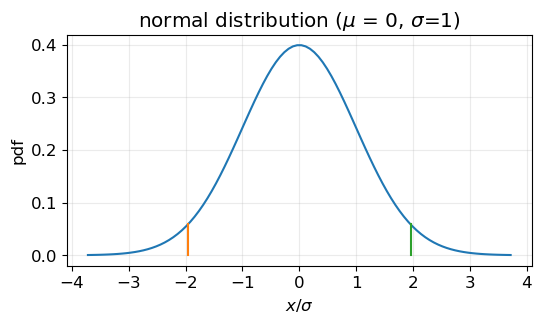

In [4]:
significance_lvl = 0.05
l_bound = sc_stats.norm.ppf(significance_lvl/2)
u_bound = sc_stats.norm.ppf(1 - significance_lvl/2)

print(f"(l_bound, u_bound) = {l_bound:.2f}, {u_bound:.2f}")



fig, ax = plt.subplots(figsize=(6, 3))

x = np.linspace(sc_stats.norm.ppf(0.0001),
                sc_stats.norm.ppf(0.9999), 100)
ax.plot(x, sc_stats.norm.pdf(x), label='norm')

ax.plot([l_bound, l_bound], [0, sc_stats.norm.pdf(l_bound)])
ax.plot([u_bound, u_bound], [0, sc_stats.norm.pdf(u_bound)])



ax.set_xlabel(r'$x/\sigma$')
ax.set_ylabel("pdf")
ax.grid("on")
ax.set_title(r"normal distribution ($\mu$ = 0, $\sigma$=1)")

plt.show(fig)

# $t$-distribution

## $t$-distribution from flipping a coin $N$ times

(I skipped this section for a moment)

## $t$-distribution (sampling from normal distribution) 

$x_1, x_2, ..., x_n$

$$
  \sigma = \sqrt{\frac{1}{n} \sum^n_{i=1} (x_i - \mu)^2}   \quad\quad \textrm{population standard deviation}
$$

$$
   \sigma_\textrm{sample} = \sqrt{\frac{1}{n-1} \sum^n_{i=1} (x_i - \mu)^2}   
   \quad \quad \textrm{sample standard deviation}
$$

[52.26405353 49.88642837]


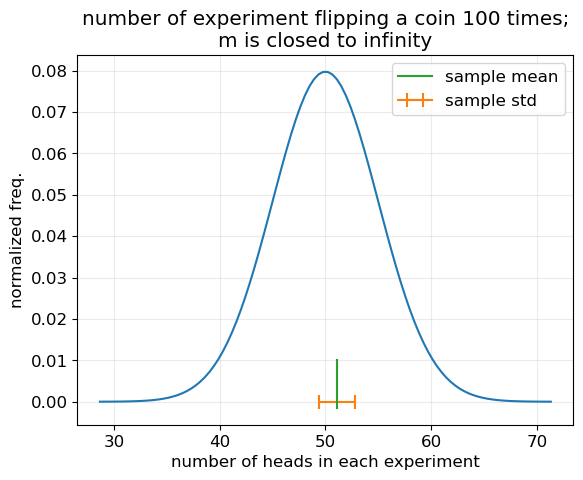

In [50]:
population_mean = 50
population_std = 5

fig, ax = plt.subplots()

x = np.linspace(sc_stats.norm.ppf(0.00001),
                sc_stats.norm.ppf(0.99999), 100)
x = x*population_std + population_mean
ax.plot(x, sc_stats.norm.pdf(x, population_mean, population_std),
  label=None)

# sampling n random numbers
n_sampling = 2
norm_rand_vars = sc_stats.norm.rvs(
  population_mean, population_std, n_sampling)
print(norm_rand_vars)

sample_mean = norm_rand_vars.mean()
sample_std = np.sqrt(sum((norm_rand_vars - sample_mean)**2) / (n_sampling-1))

# plot sample_mean and sample_std
ax.errorbar(
  sample_mean, 0, xerr=sample_std, capsize=5, capthick=1.5, 
  label="sample std")
ax.plot([sample_mean, sample_mean], [-0.0015, 0.01],
  label="sample mean")

ax.set_xlabel("number of heads in each experiment")
ax.set_ylabel("normalized freq.")
ax.set_title(f"number of experiment flipping a coin {N} times;\nm is closed to infinity")
ax.grid("on")
ax.legend(loc="best")

plt.show(fig)

Let $x_1, \ldots, x_n$ be the numbers observed in a sample from a continously distributed population with expected value $\mu$. The sample mean and sample variance are given by:

$$
\begin{gather*}
  \overline{x} = \frac{x_1 + \ldots + x_n}{n} \\\
  s^2 = \frac{1}{n-1} \sum^n_{i=1} (x_i - \overline{x})^2
\end{gather*}
$$

The resulting *t-value* is

$$
t = \frac{\overline{x} - \mu}{s /\sqrt{n}}
$$

In [199]:
rng = np.random.default_rng()

population_mean = 50
population_std = 5
n_sampling = 2   # you can change this up to 30  

# number of experiment (how many times we do n_sampling)
t_m = 10000
t_rand_vars = np.empty(t_m)

# Do N flipping coins m times
for i in range(t_m):
  norm_rand_vars = sc_stats.norm.rvs(
    population_mean, population_std, n_sampling)
  sample_mean = norm_rand_vars.mean()
  sample_std = np.sqrt(sum((norm_rand_vars - sample_mean)**2) / (n_sampling - 1))

  t_rand_vars[i] = (sample_mean - population_mean) \
    /(sample_std / np.sqrt(n_sampling))

t_rand_vars[:20],   #  print the first 20 random variable sampled from t-distribution
min(t_rand_vars), max(t_rand_vars)

(-1096.0414816079133, 63499.634747522294)

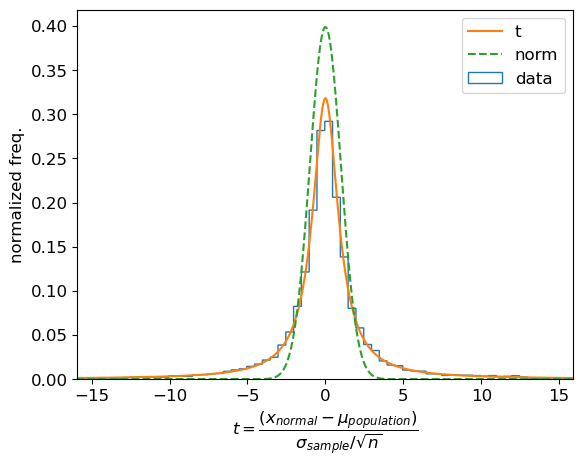

In [201]:
fig, ax = plt.subplots()

binwidth = 0.5
min_t_rand_vars = min(t_rand_vars) 
max_t_rand_vars = max(t_rand_vars) 
bins = np.arange(min_t_rand_vars, max_t_rand_vars + binwidth, binwidth)
ax.hist(t_rand_vars, bins=bins, histtype="step", density=True, label="data")

# pdf of t-distribution
x = np.linspace(sc_stats.t.ppf(0.01, n_sampling-1),
                sc_stats.t.ppf(0.99, n_sampling-1), 1000)
ax.plot(x, sc_stats.t.pdf(x, n_sampling-1), label='t')

# pdf of normal distribution
ax.plot(x, sc_stats.norm.pdf(x), linestyle='--', label='norm')

ax.set_xlabel(r"$t = \dfrac{(x_{normal} - \mu_{population})}{\sigma_{sample}/\sqrt{n}}$")
ax.set_ylabel("normalized freq.")
ax.set_xlim([0.5*min(x), 0.5*max(x)])
ax.legend(loc='best')

plt.show(fig)


## $t$-distribution generated by `scipy`

(l_bound, u_bound) = -2.31, 2.31


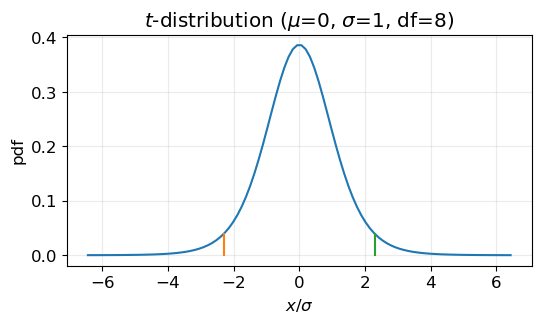

In [8]:
significance_lvl = 0.05
num_of_samples = 10
df = num_of_samples - 2    # degree of freedom

l_bound = sc_stats.t.ppf(significance_lvl/2, df)
u_bound = sc_stats.t.ppf(1 - significance_lvl/2, df)

print(f"(l_bound, u_bound) = {l_bound:.2f}, {u_bound:.2f}")



fig, ax = plt.subplots(figsize=(6, 3))

x = np.linspace(sc_stats.t.ppf(0.0001, df),
                sc_stats.t.ppf(0.9999, df), 100)
ax.plot(x, sc_stats.t.pdf(x, df), label='norm')

ax.plot([l_bound, l_bound], [0, sc_stats.t.pdf(l_bound, df)])
ax.plot([u_bound, u_bound], [0, sc_stats.t.pdf(u_bound, df)])


ax.set_xlabel(r'$x/\sigma$')
ax.set_ylabel("pdf")
ax.grid("on")
ax.set_title(r"$t$-distribution ($\mu$=0, $\sigma$=1, df={:d})".format(df))

plt.show(fig)


# $\chi^2$-distribution

If $Z_1, \ldots, Z_k$ are independent, standard normal random variables, then the sum of their squares, 
$$
  Q = \sum^k_{i=1} Z^2_i,
$$
is distributed according to the $\chi^2$-distribution with $k$ degrees of freedom.

# F-distribution

The $F$-distribution with $d_1$ and $d_2$ degrees of freedom is the distribution of 
$$
  X = \frac{S_1/d_1}{S_2/d_2}
$$
where $S_1$ and $S_2$ are independent random variables with $\chi^2$-distribution with respective degrees of freedom $d_1$ and $d_2$.

# Comparison all distribution

In [3]:
def add_norm_pdf(ax, significance_lvl=0.05,
  zmin=1e-4, n_points=100):

  u_bound = sc_stats.norm.ppf(significance_lvl/2)
  l_bound = sc_stats.norm.ppf(1 - significance_lvl/2)

  x = np.linspace(sc_stats.norm.ppf(zmin),
                  sc_stats.norm.ppf(1-zmin), n_points)
  normal_pdf_handler = ax.plot(x, sc_stats.norm.pdf(x), 
    label=f"norm: ({l_bound:.2f}, {u_bound:.2f})")
  color_normal_pdf = normal_pdf_handler[0]._color

  ax.plot([l_bound, l_bound], [0, sc_stats.norm.pdf(l_bound)],
    color=color_normal_pdf)
  ax.plot([u_bound, u_bound], [0, sc_stats.norm.pdf(u_bound)],
    color=color_normal_pdf)

  return ax, [l_bound, u_bound]

def add_t_pdf(ax, significance_lvl=0.05, num_of_samples=10,
  tmin=1e-4, n_points=100):

  df = num_of_samples - 2    # degree of freedom

  l_bound = sc_stats.t.ppf(significance_lvl/2, df)
  u_bound = sc_stats.t.ppf(1 - significance_lvl/2, df)

  x = np.linspace(sc_stats.t.ppf(tmin, df),
                  sc_stats.t.ppf(1-tmin, df), n_points)
  t_pdf_handler = ax.plot(x, sc_stats.t.pdf(x, df), 
    label=f"t ({l_bound:.2f}, {u_bound:.2f})")
  color_t_pdf = t_pdf_handler[0]._color

  ax.plot([l_bound, l_bound], [0, sc_stats.t.pdf(l_bound, df)],
    color=color_t_pdf)
  ax.plot([u_bound, u_bound], [0, sc_stats.t.pdf(u_bound, df)],
    color=color_t_pdf)

  return ax, [l_bound, u_bound]

def add_chiSq_pdf(ax, significance_lvl=0.05, num_of_samples=10,
  qmin=1e-4, n_points=100):

  df = num_of_samples    # degree of freedom

  l_bound = sc_stats.chi2.ppf(significance_lvl/2, df)
  u_bound = sc_stats.chi2.ppf(1 - significance_lvl/2, df)

  x = np.linspace(sc_stats.chi2.ppf(qmin, df),
                  sc_stats.chi2.ppf(1-qmin, df), n_points)
  chiSq_pdf_handler = ax.plot(x, sc_stats.chi2.pdf(x, df), 
    label=f"chiSq ({l_bound:.2f}, {u_bound:.2f})")
  color_chiSq_pdf = chiSq_pdf_handler[0]._color

  ax.plot([l_bound, l_bound], [0, sc_stats.chi2.pdf(l_bound, df)],
    color=color_chiSq_pdf)
  ax.plot([u_bound, u_bound], [0, sc_stats.chi2.pdf(u_bound, df)],
    color=color_chiSq_pdf)

  return ax, [l_bound, u_bound]

def add_F_pdf(ax, significance_lvl=0.05, num_of_samples=10,
  xmin=1e-4, n_points=100):

  dfn = 1    # degree of freedom of numerator
  dfd = num_of_samples - 2       # degree of freedom of denominator

  l_bound = 0
  u_bound = sc_stats.f.ppf(1 - significance_lvl, dfn, dfd)

  x = np.linspace(0, sc_stats.f.ppf(1-xmin, dfn, dfd), n_points)
  F_pdf_handler = ax.plot(x, sc_stats.f.pdf(x, dfn, dfd), 
    label=f"F ({l_bound:.2f}, {u_bound:.2f})")
  color_F_pdf = F_pdf_handler[0]._color

  ax.plot([l_bound, l_bound], [0, sc_stats.f.pdf(l_bound, dfn, dfd)],
    color=color_F_pdf)
  ax.plot([u_bound, u_bound], [0, sc_stats.f.pdf(u_bound, dfn, dfd)],
    color=color_F_pdf)

  return ax, [l_bound, u_bound]

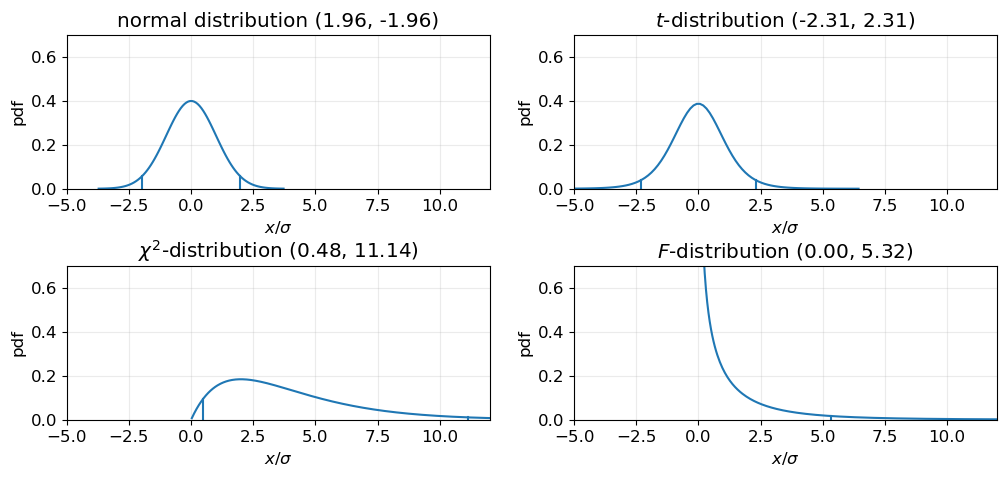

In [4]:
significance_lvl = 0.05
num_of_samples = 10 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))

bound_arr = np.empty((2, 2, 2))
distribution_name_arr = [
  ["normal ", "$t$-"],
  ["$\chi^2$-", "$F$-"]]

axes[0, 0], bound_arr[0, 0] = add_norm_pdf(axes[0, 0], significance_lvl=significance_lvl)
axes[0, 1], bound_arr[0, 1] = add_t_pdf(axes[0, 1], significance_lvl=significance_lvl,
  num_of_samples=num_of_samples)
axes[1, 0], bound_arr[1, 0] = add_chiSq_pdf(axes[1, 0], significance_lvl=significance_lvl, 
  num_of_samples=4, n_points=1000)
axes[1, 1], bound_arr[1, 1] = add_F_pdf(axes[1, 1], significance_lvl=significance_lvl,
  num_of_samples=10, n_points=1000)

for axes_i, bound_i, distribution_name_i in zip(axes, bound_arr, distribution_name_arr):
  for ax, bound, distribution_name in zip(axes_i, bound_i, distribution_name_i):
    ax.set_ylim([0, 0.7])
    ax.set_xlim([-5, 12])
    ax.set_xlabel(r'$x/\sigma$')
    ax.set_ylabel("pdf")
    ax.grid("on")
    ax.set_title(r"{}distribution ({:.2f}, {:.2f})".format(distribution_name, bound[0], bound[1]))

#ax.legend(loc="upper left", bbox_to_anchor=[1.01, 1.04])

plt.subplots_adjust(hspace=0.5)
plt.show(fig)
